In [35]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [42]:
image = Image.open('totoro.jpg')
# Define the downsampling factor
downsample_factor = 10

# Downsample the image
downsampled_image = image.resize((image.width // downsample_factor, image.height // downsample_factor))
pixel_array = np.array(downsampled_image)

In [43]:
height, width, _ = pixel_array.shape

In [44]:
pixels = pixel_array.reshape(height*width,3)/255

In [45]:
r = pixels[:,0]
g = pixels[:,1]
b = pixels[:,2]

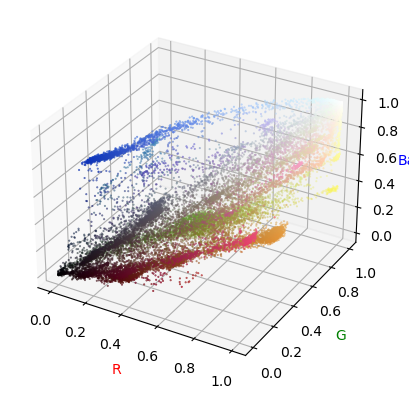

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

step = 1
ax.scatter(r[::step], g[::step], b[::step], c=pixels[::step], s=1, marker='.')
ax.set_xlabel('R', color='r')
ax.set_ylabel('G', color='g')
ax.set_zlabel('Baaa', color='b')
plt.show()

In [131]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init='auto').fit(pixels)

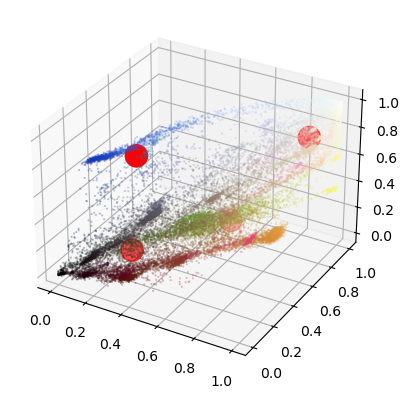

In [132]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(r[::step], g[::step], b[::step], c=pixels[::step], s=1, marker='.', alpha=0.3)
ax.scatter(centers[:,0], centers[:,1], centers[:,2], c='red', s=256)
plt.show()

In [133]:
from collections import Counter
counted = Counter(labels)
counted, centers

(Counter({0: 1606, 1: 5071, 3: 6848, 2: 7211}),
 array([[0.23050946, 0.36124138, 0.73269149],
        [0.89685138, 0.86810352, 0.7895894 ],
        [0.29920185, 0.19727593, 0.17171055],
        [0.64538927, 0.54842056, 0.28839092]]))

In [134]:
import random
# Define the width and height of the image
image_width = 400
image_height = 200

# Define the weights and RGB color values
weights = []
colors = []
for i, color in enumerate(centers):
    weights.append(counted[i])
    colors.append(tuple(np.round(color*255).astype(int)))

combined_lists = list(zip(weights, colors))
# Shuffle the combined lists
random.shuffle(combined_lists)
# Unzip the shuffled lists
weights, colors = zip(*combined_lists)

# Calculate the total weight
total_weight = sum(weights)

# Calculate the width of each strip
strip_widths = [int(weight / total_weight * image_width) for weight in weights]

# Create a new image with RGB mode and white background
image = Image.new('RGB', (image_width, image_height), (255, 255, 255))

# Draw the color strips on the image
start_x = 0
for color, width in zip(colors, strip_widths):
    image.paste(color, (start_x, 0, start_x + width, image_height))
    start_x += width

# Save and display the image
image.save('weighted_strips_s.png')
image.show()

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

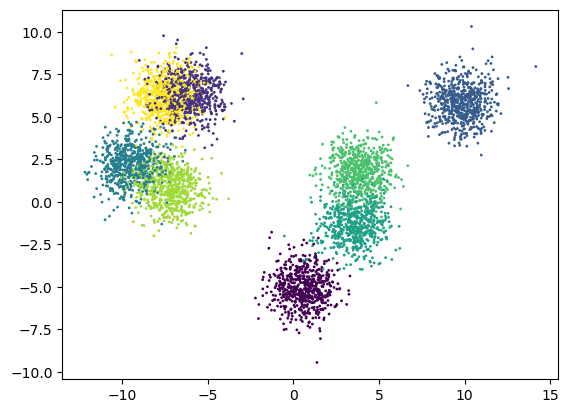

In [6]:
centers = 8         # n centers of points produced
samples = 5000      # number of points produced
n_clusters = 14     # maximum number of clusters to test

# Dataset where X is the coordinate and y are the labels
X, y = make_blobs(n_samples=5000, centers=8)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=1)

In [7]:
# Iteration and metrics
metrics = {'wcss':[],
           'silhouette':[],
           'db_index':[],
           'ch_index':[]}
labels = []
cluster_centers = []
for k in range(2, n_clusters):
    # Kmeans fit
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(X)
    labels.append(kmeans.labels_)
    cluster_centers.append(kmeans.cluster_centers_)

    # Within cluster sum of squares
    metrics['wcss'].append(kmeans.inertia_)

    # Silhouette coefficient
    silhouette = silhouette_score(X, labels[-1])
    metrics['silhouette'].append(silhouette)

    # Davies-Bouldin index
    db_index = davies_bouldin_score(X, labels[-1])
    metrics['db_index'].append(db_index)

    # Calinski-Harabasz index
    ch_index = calinski_harabasz_score(X, labels[-1])
    metrics['ch_index'].append(ch_index)

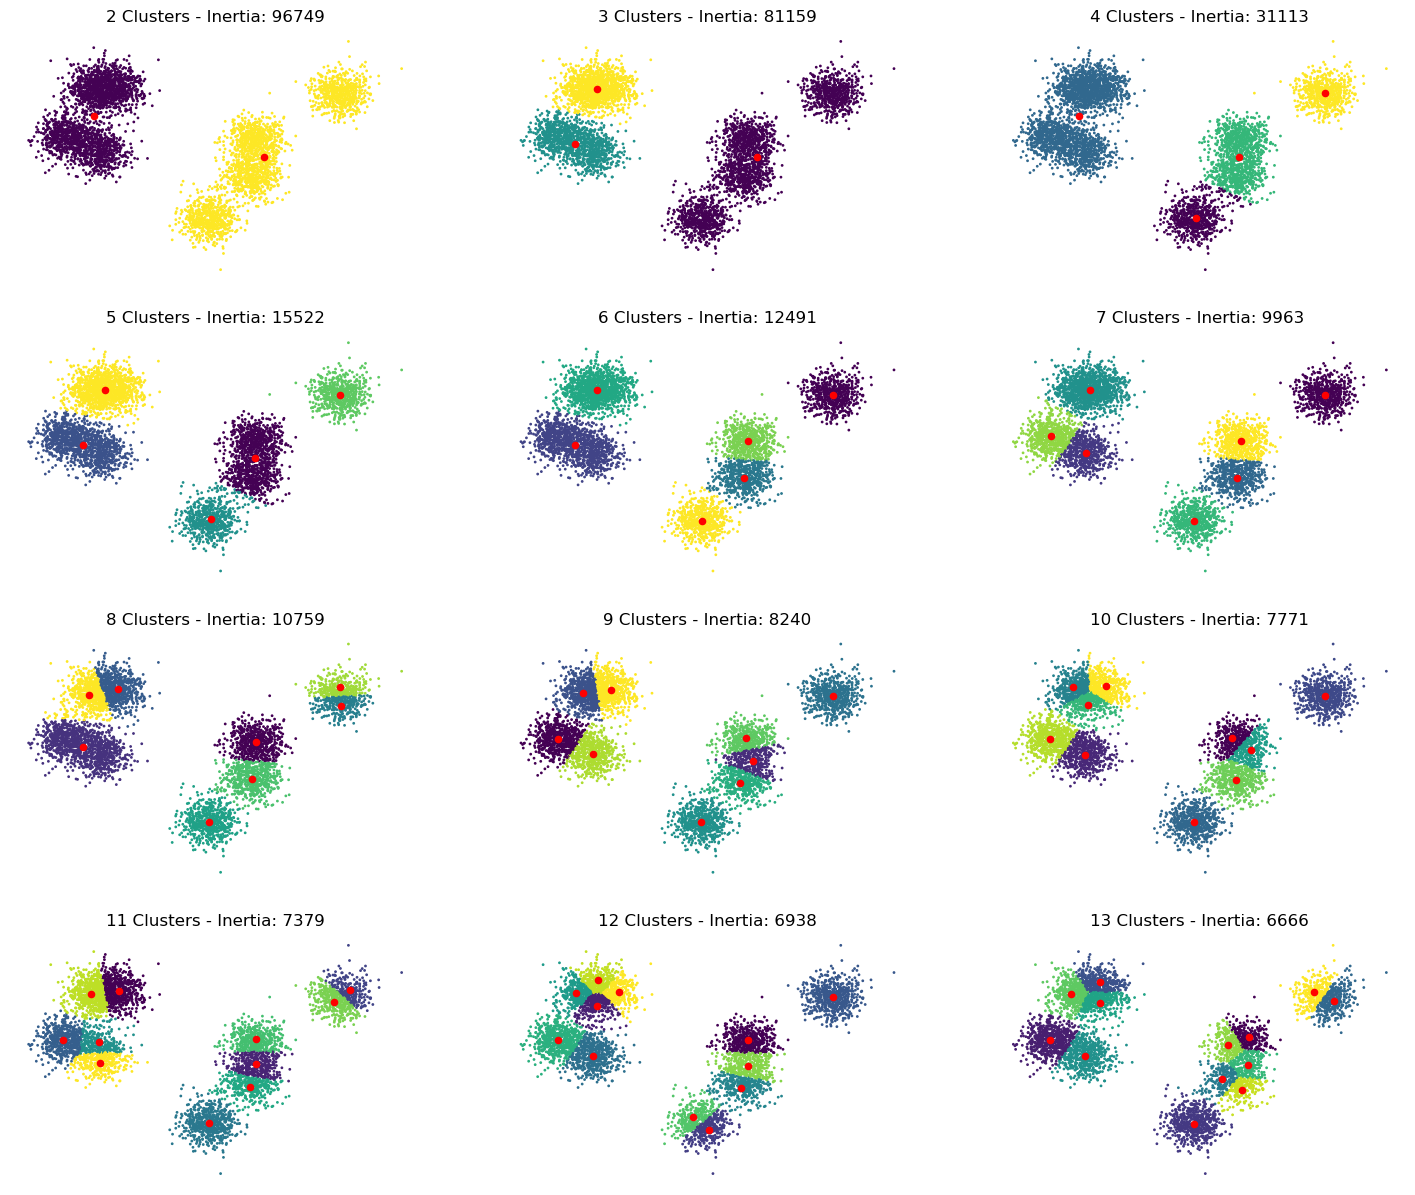

In [10]:
# The plots of increasing number of clusters
cols = 3
rows = n_clusters//cols
fig, axes = plt.subplots(rows, cols, figsize=(18,15))

for i, label, center, inertia in zip(range(len(labels)), labels, cluster_centers, metrics['wcss']):
    ax = axes.flatten()[i]
    ax.scatter(X[:,0], X[:,1], c=label, cmap='viridis', s=1)
    ax.scatter(center[:,0], center[:,1], marker='o', c='red', s=20)
    ax.set(title=f'{len(center)} Clusters - Inertia: {round(inertia)}')
    ax.legend([],[], frameon=False)
    ax.axis('off')

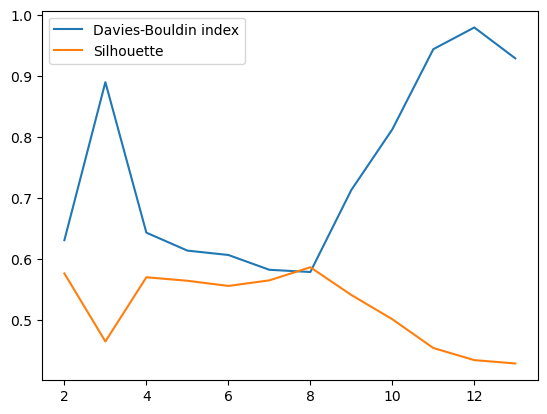

In [201]:
# lower is better
plt.plot(range(2,n_clusters), metrics['db_index'], label='Davies-Bouldin index')
# the higher, the better
plt.plot(range(2,n_clusters), metrics['silhouette'], label='Silhouette')
plt.legend()

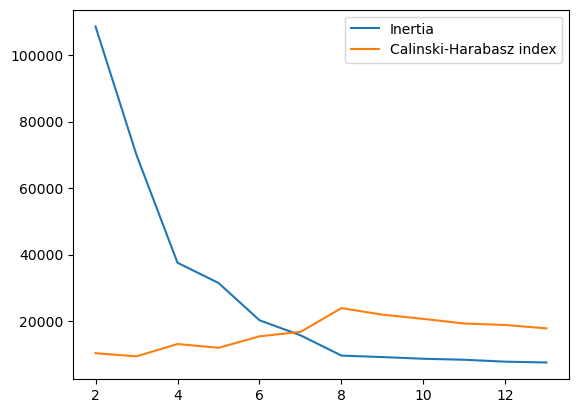

In [200]:
# lower is better
plt.plot(range(2,n_clusters), metrics['wcss'], label='Inertia')
# the higher, the better
plt.plot(range(2,n_clusters), metrics['ch_index'], label='Calinski-Harabasz index')
plt.legend()